In [1]:
import sys
sys.path.append("./../utils/")
sys.path.append("./../")
from sklearn.preprocessing import StandardScaler
from datetime import datetime

#Modules of src folder
from tools import dotdict
import run_non_deepl
%matplotlib inline
%cd  .. 

/Users/timw/Documents/University/thesis_2


## Parameters

In [2]:
args = dotdict({})
args.model_params = dotdict({})
args.train_params = dotdict({})

args.experiment_name = "Exp0"

# Data loading
args.from_raw = True
args.file_name = "smard_data.csv"
from_raw_folder = "raw" if args.from_raw else "preproc_non_deepl"
args.path = f"./data/{from_raw_folder}/{args.file_name}"

# Preprocessing
args.scaler_name = "std"
args.scaler = {"std":StandardScaler()}[args.scaler_name]

# Model and its hyperparameters
args.model_name = "linreg"
args.model_params = None
args.train_params = None

# Prediction
args.forecast_setting = "both"
args.cols_to_lag = ['load', 'solar_gen', 'wind_gen']
args.targets = [['load', 'solar_gen', "wind_gen"], ['load'], ['solar_gen'], ['wind_gen']]
args.window_size = 96
args.stride = 1 # Has to be <= min(window_size, forecast_horizon) and stride * integer = window_size,
# and stride * integer2 = forecast_horizon
args.lead_time = 0 # TODO: Not working yet
args.forecast_horizons = [24, 48, 96, 192, 336, 720]

# Plotting
args.plot = True
args.plot_date = '2021-07-01'
args.days = 10

# Save model
args.save_model = False
args.save_benchmark = True
args.date_time = datetime.now().strftime("%m-%d-%H")

------- Starting to train linreg on ['load', 'solar_gen', 'wind_gen'] for horizons [24, 48, 96, 192, 336, 720] ----------
------- Starting to train linreg on ['load'] for horizons [24, 48, 96, 192, 336, 720] ----------
------- Starting to train linreg on ['solar_gen'] for horizons [24, 48, 96, 192, 336, 720] ----------
------- Starting to train linreg on ['wind_gen'] for horizons [24, 48, 96, 192, 336, 720] ----------


/Users/timw/Documents/University/thesis_2/scripts/./../utils/visualizations.py:31: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(15,6))


                        mae       mse
target    horizon                    
load      24       0.305490  0.220517
          48       0.379160  0.326976
          96       0.429227  0.411563
          192      0.463077  0.471201
          336      0.487280  0.505029
          720      0.512213  0.531734
          24       0.236078  0.103102
          48       0.266724  0.125477
          96       0.261563  0.125919
          192      0.255785  0.126176
          336      0.267103  0.134395
          720      0.287121  0.148231
solar_gen 24       0.195420  0.117182
          48       0.224910  0.148044
          96       0.255161  0.182084
          192      0.280080  0.212848
          336      0.298100  0.233303
          720      0.333260  0.269034
wind_gen  24       0.490630  0.447946
          48       0.653767  0.715284
          96       0.780509  0.935514
          192      0.863440  1.082390
          336      0.901207  1.149113
          720      0.920881  1.183079


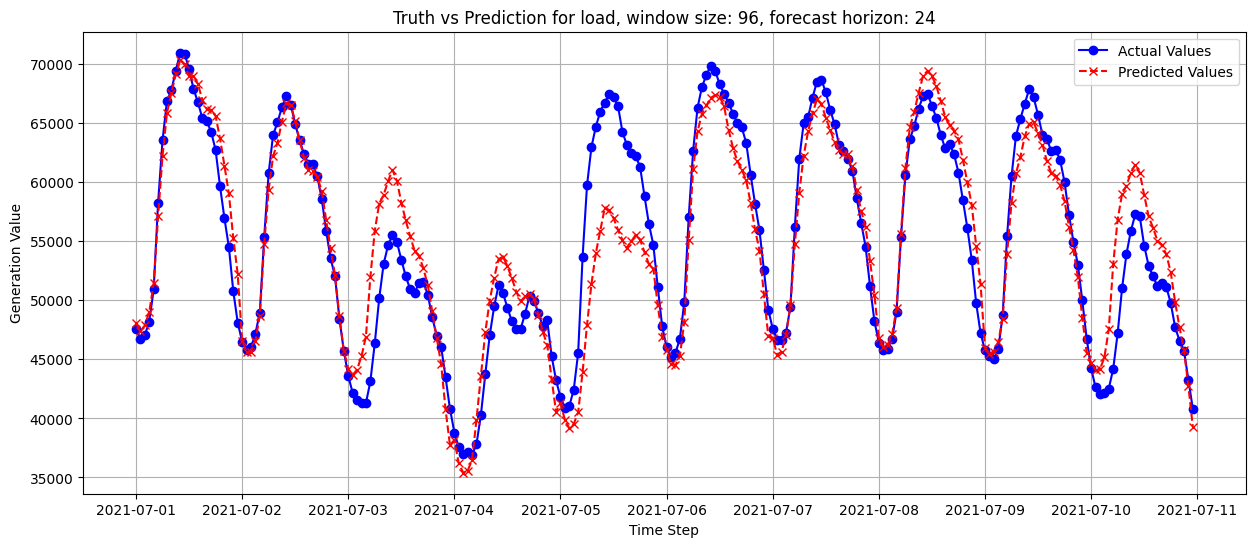

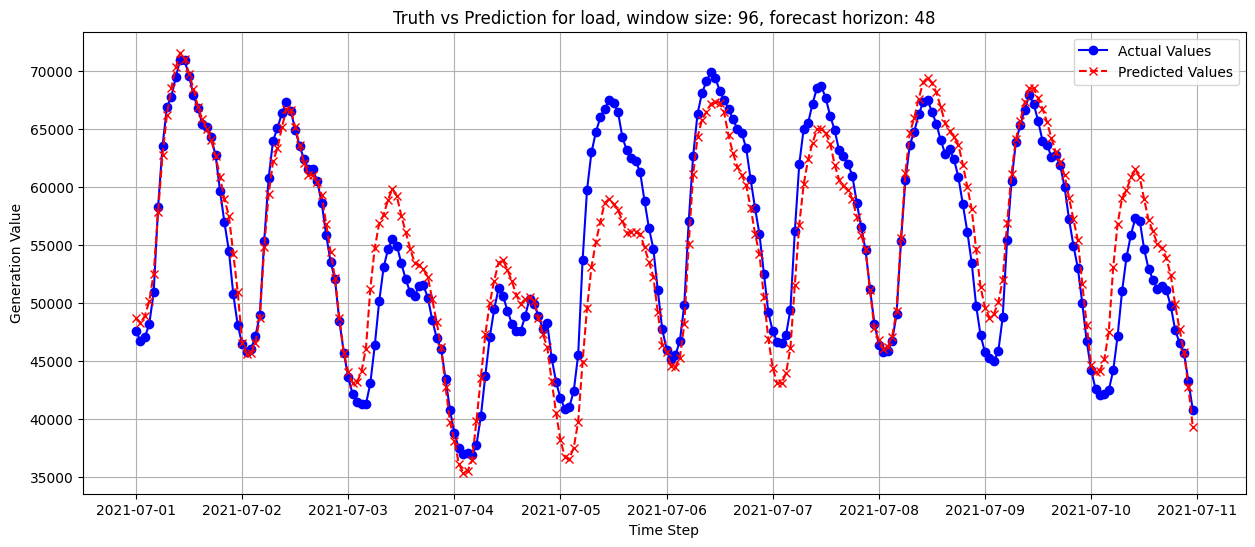

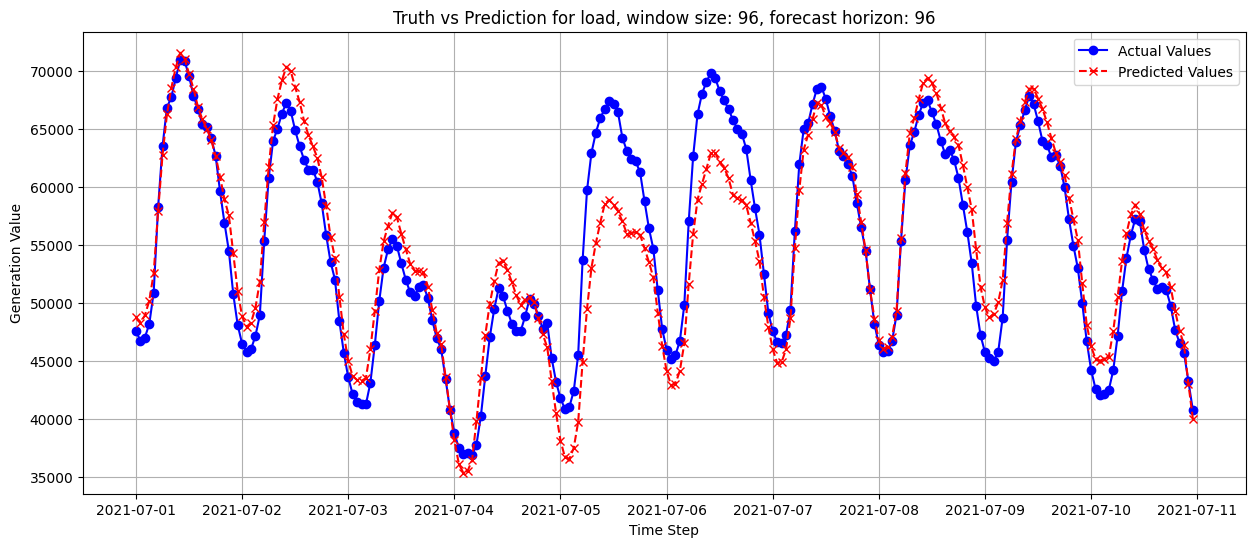

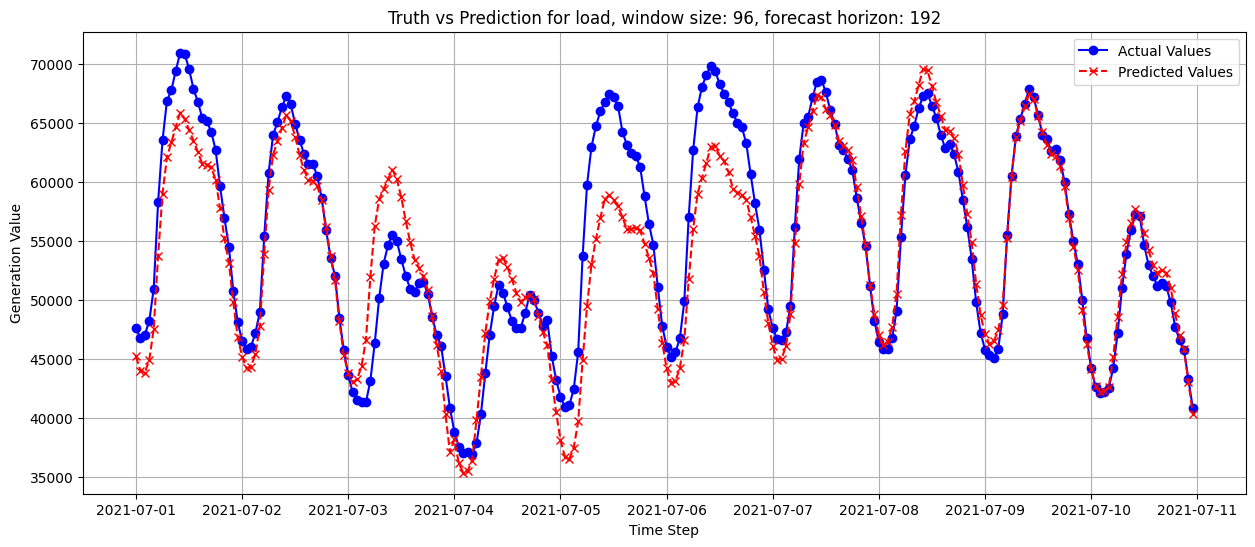

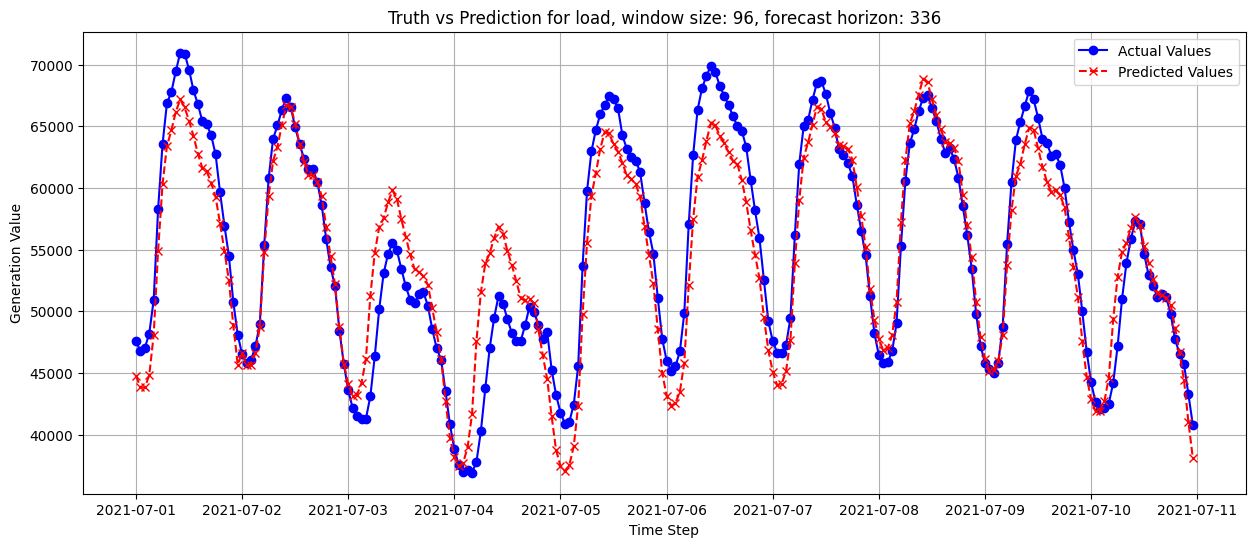

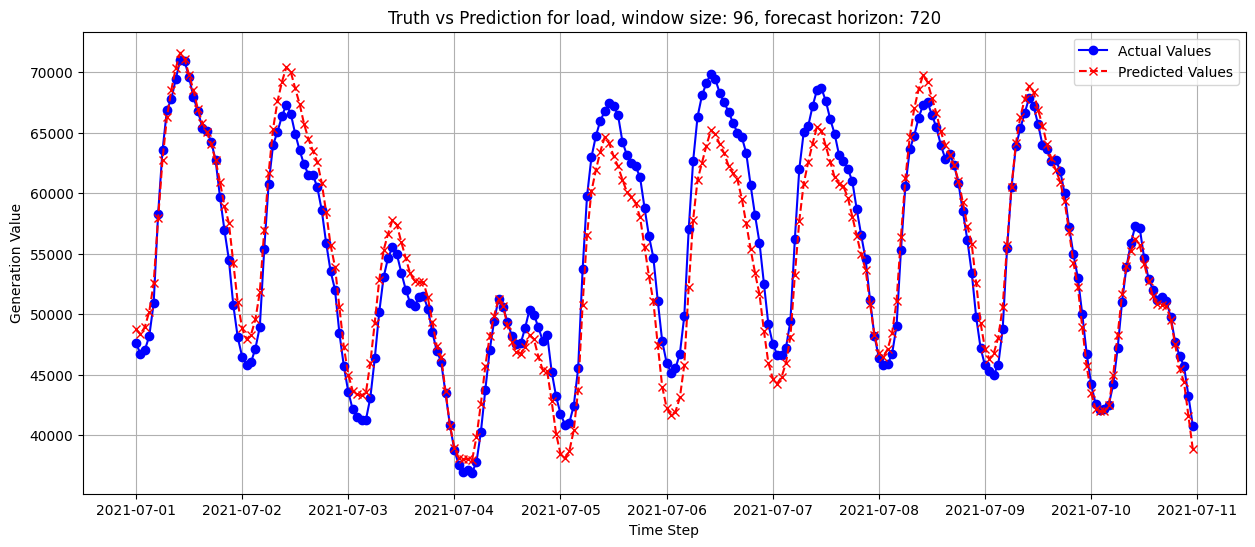

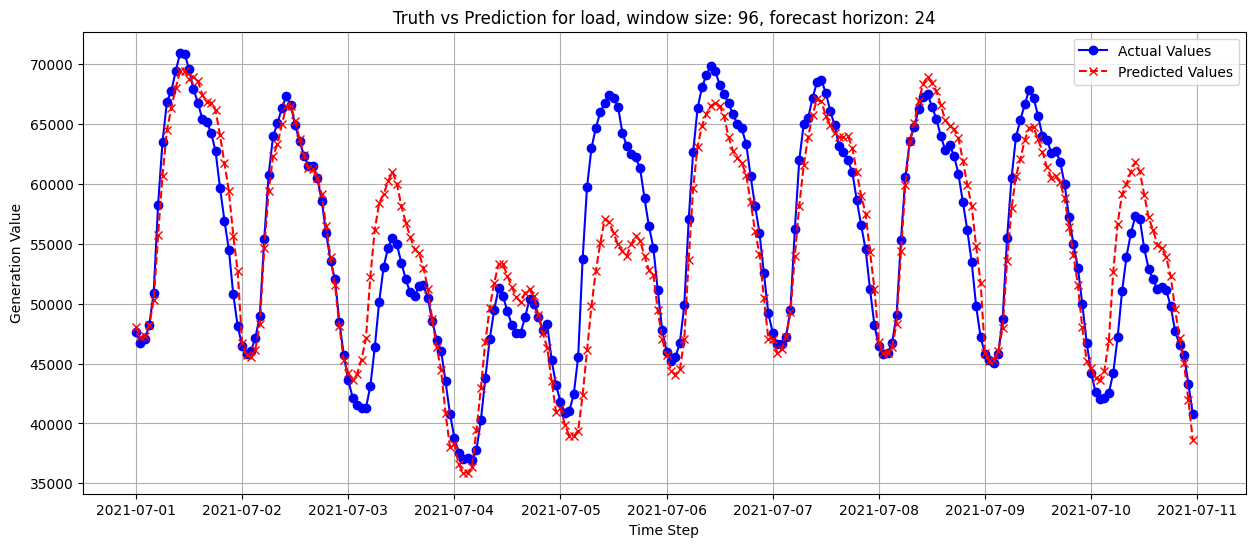

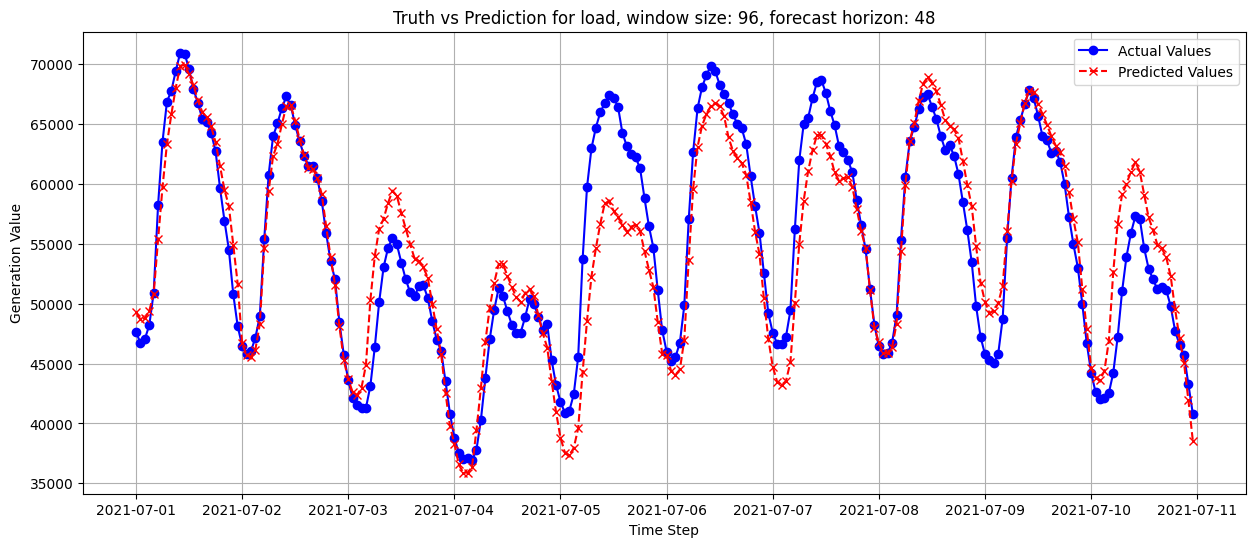

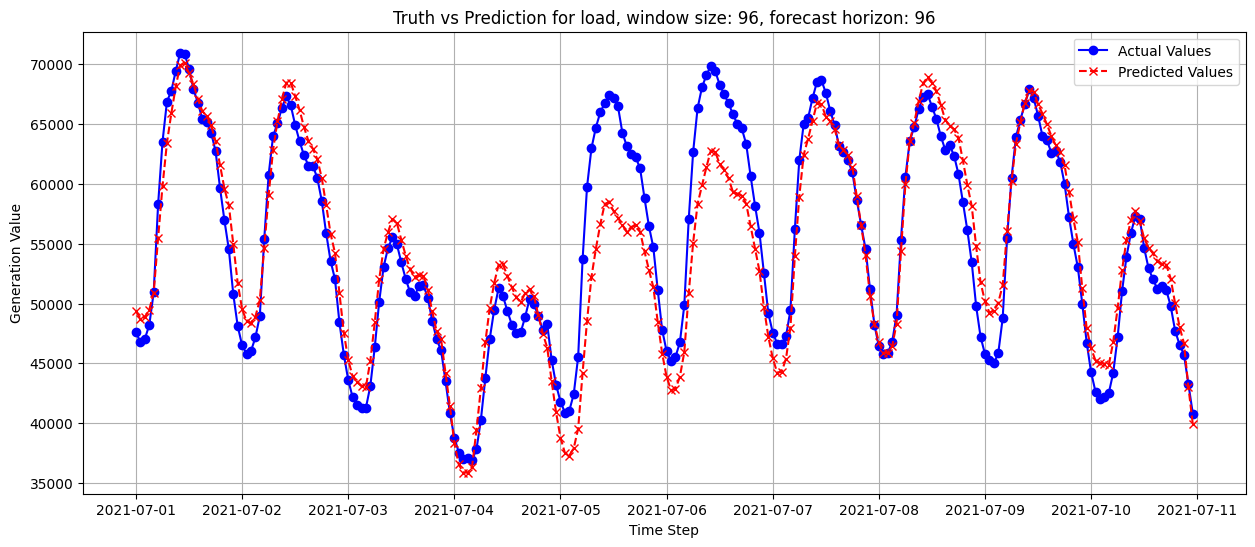

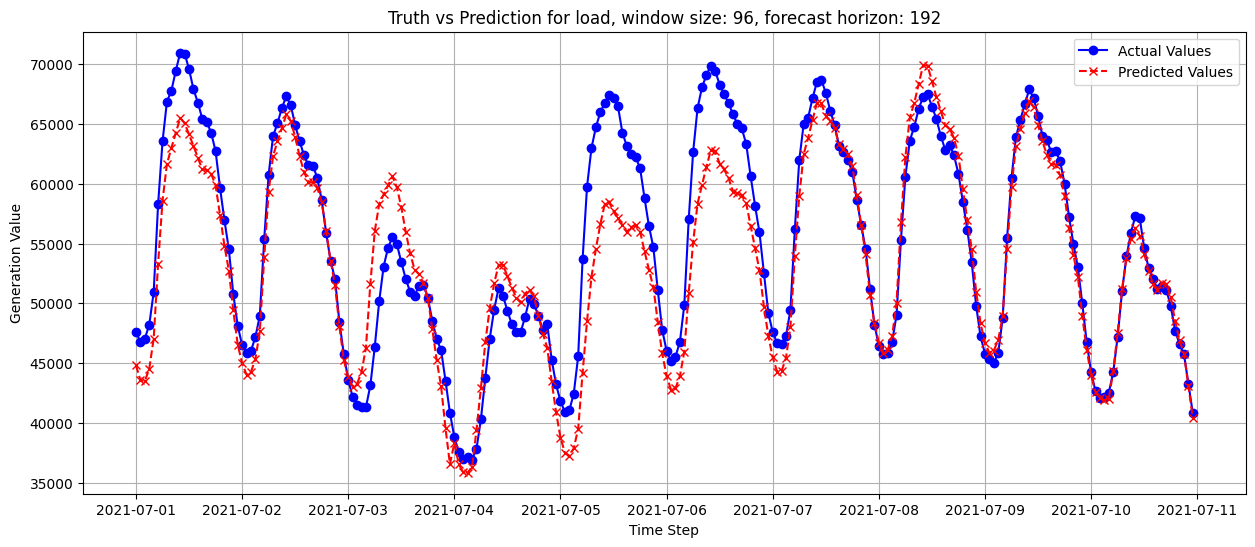

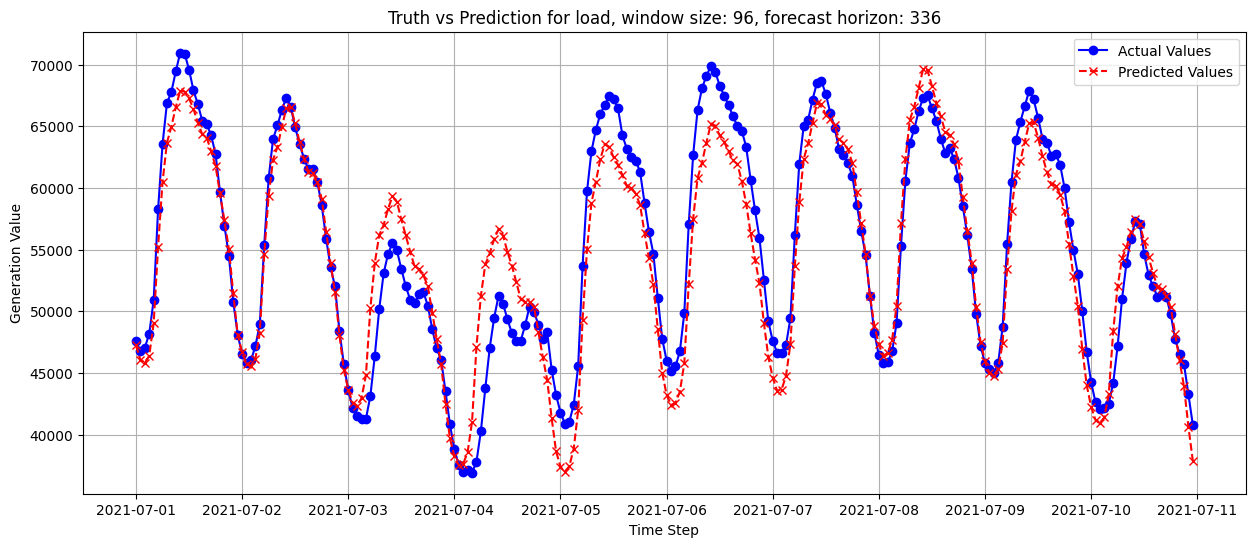

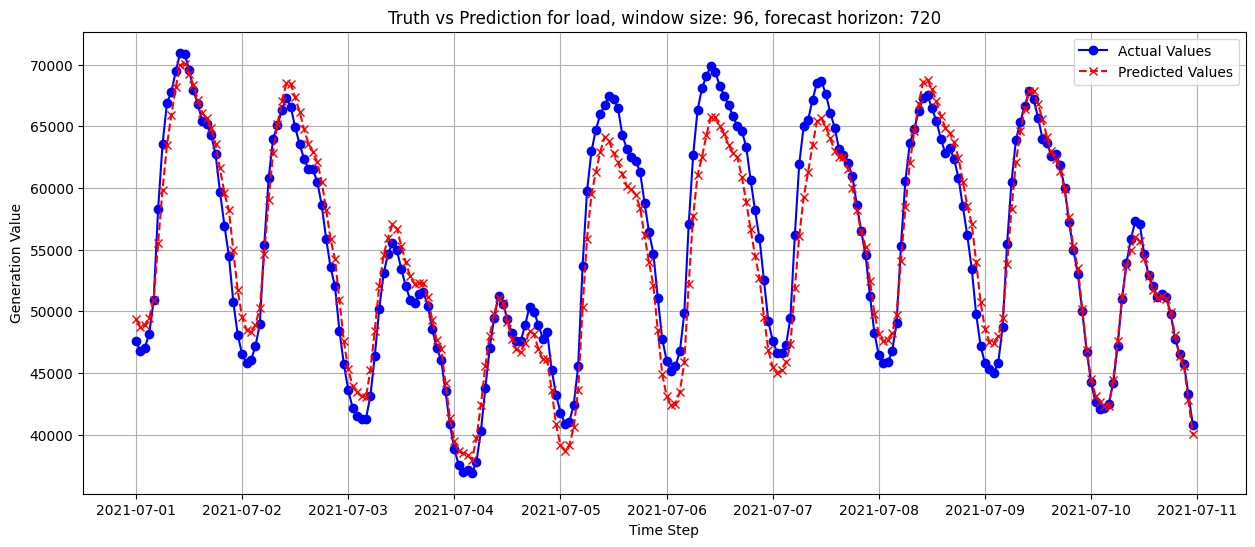

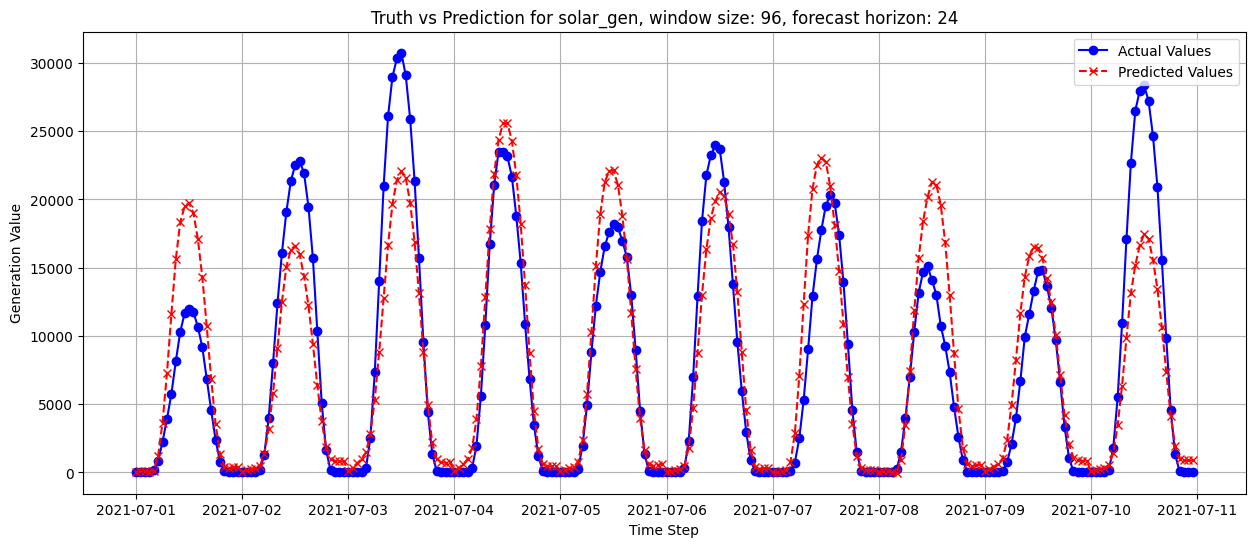

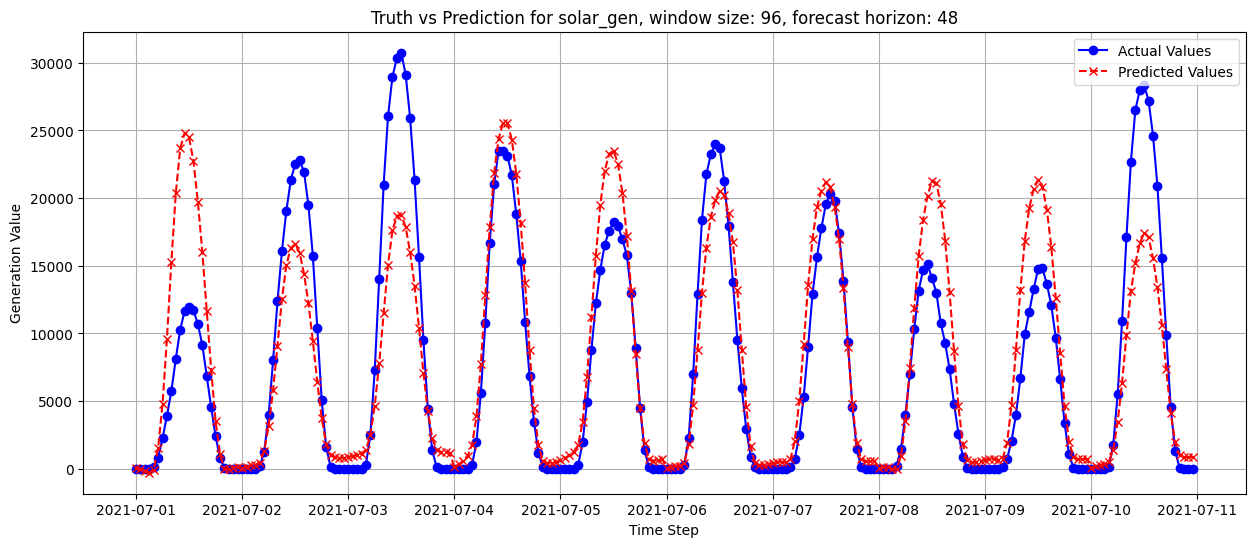

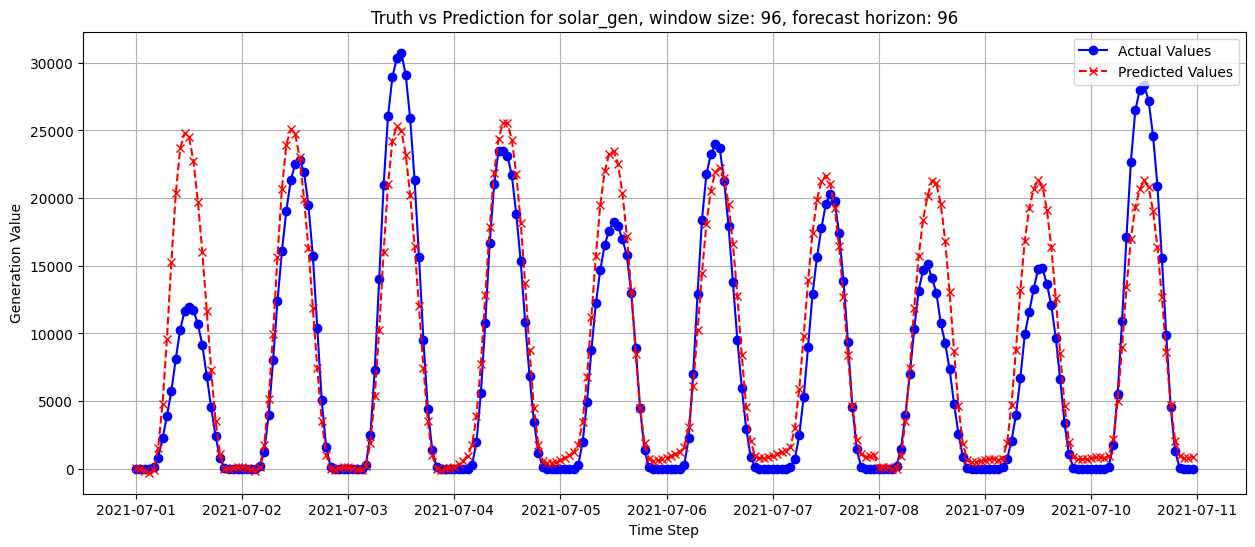

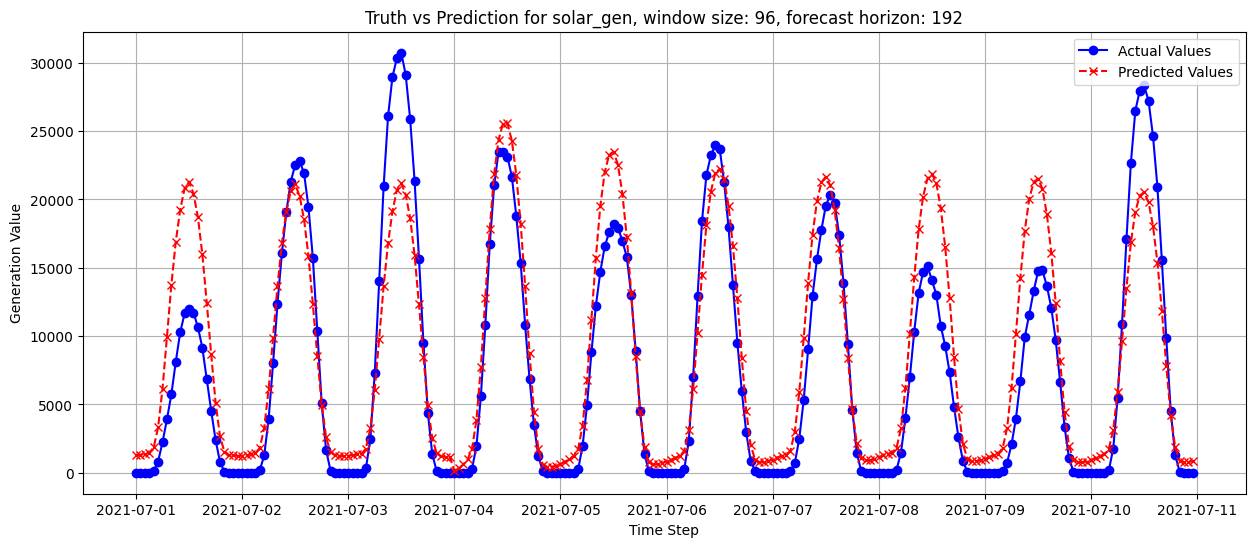

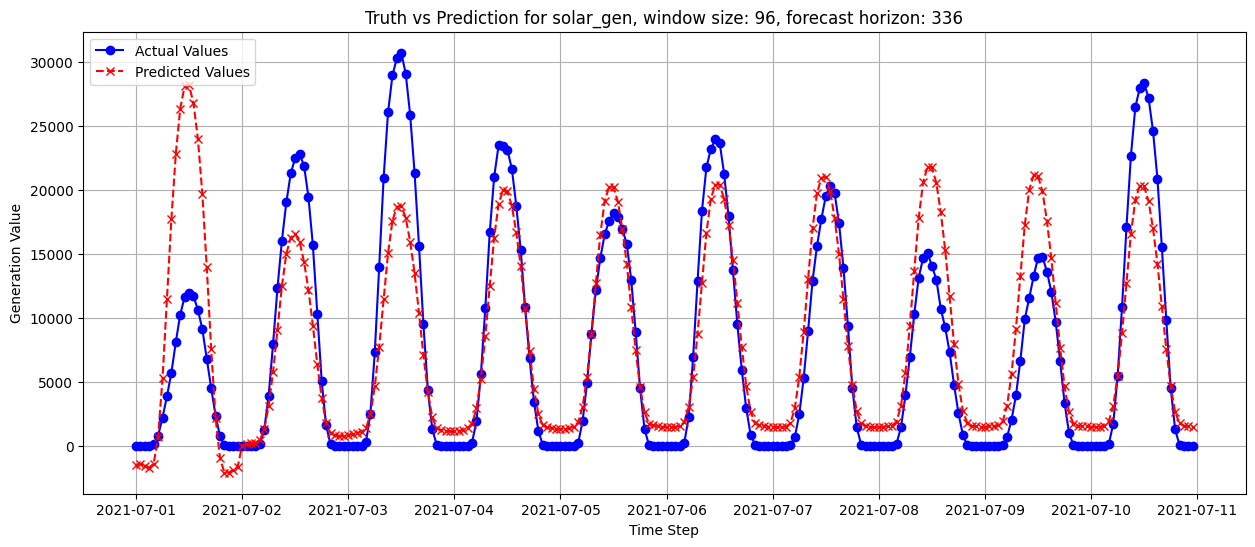

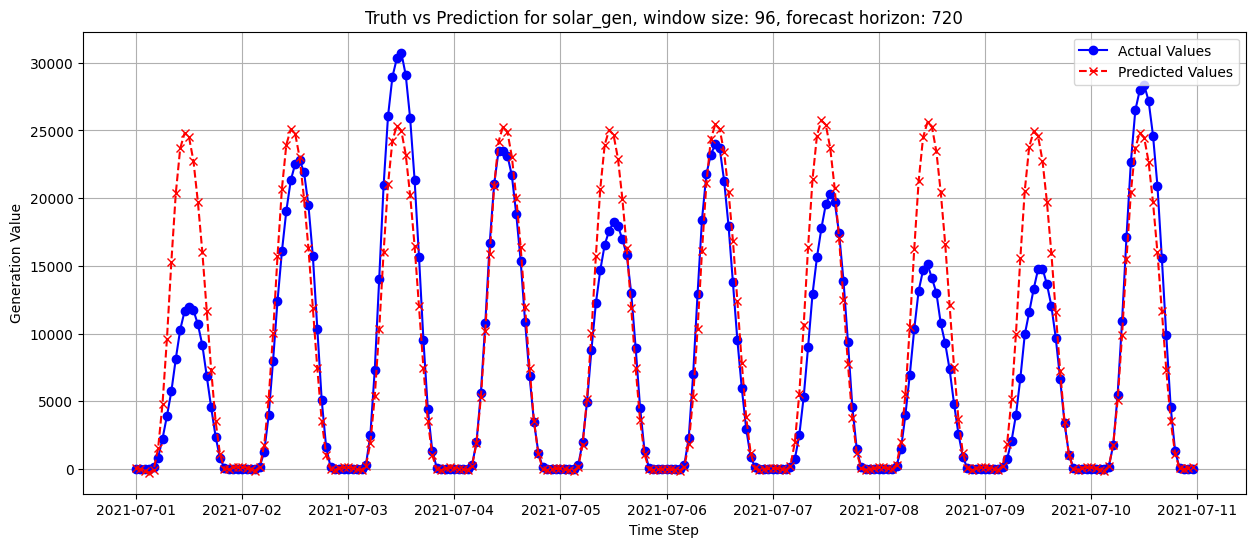

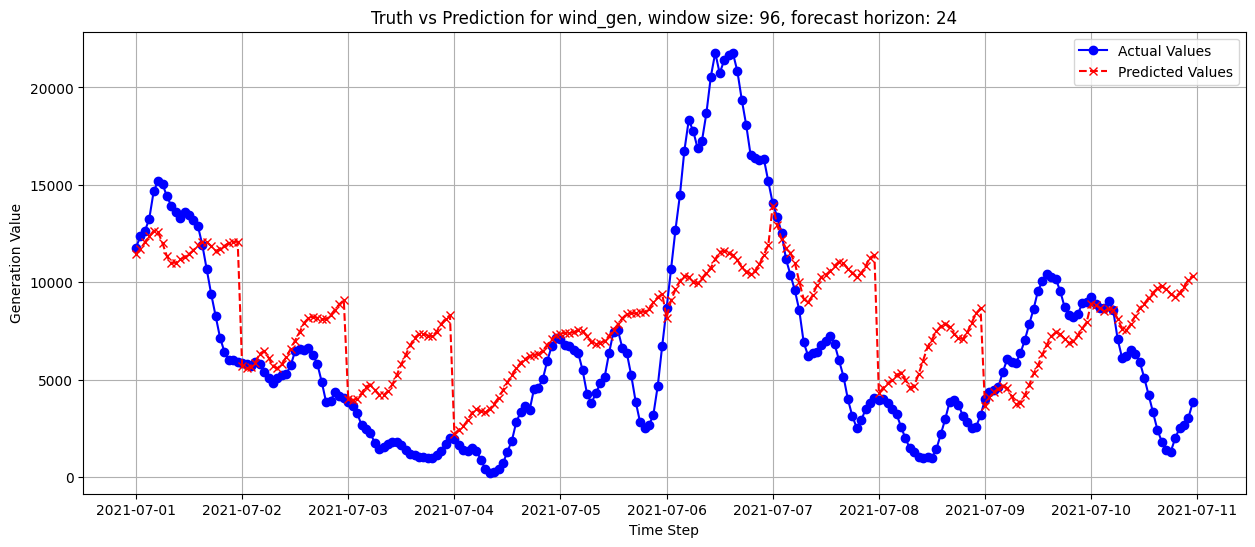

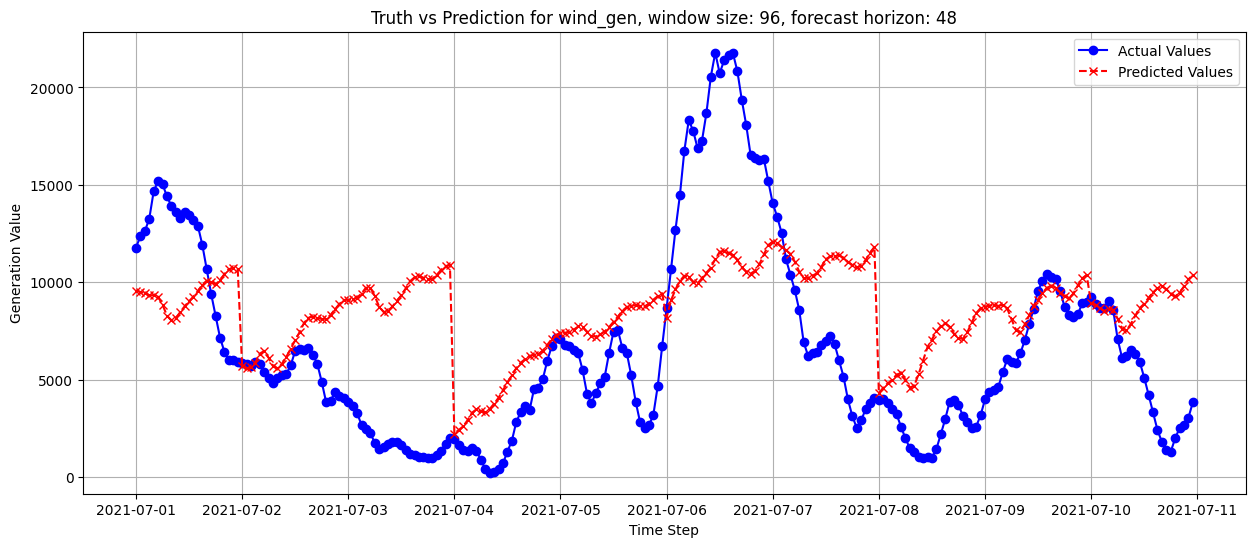

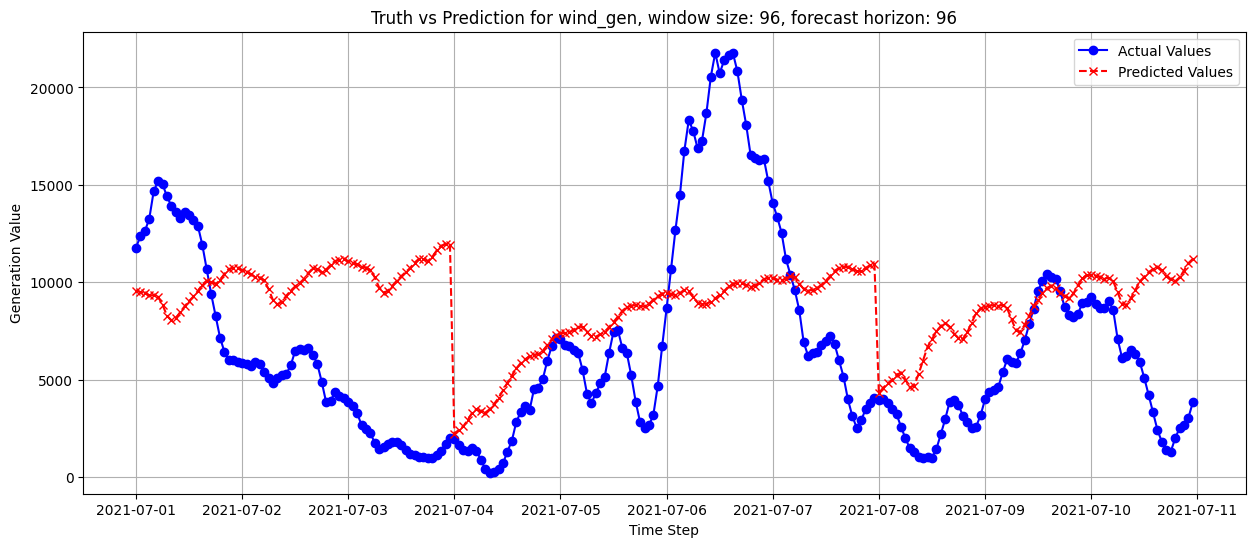

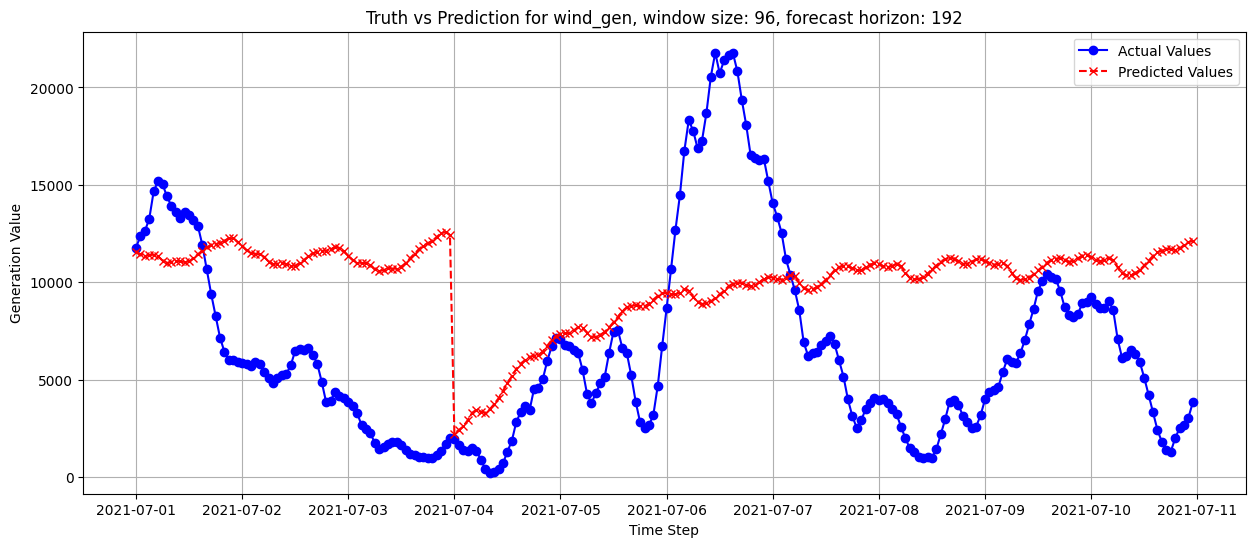

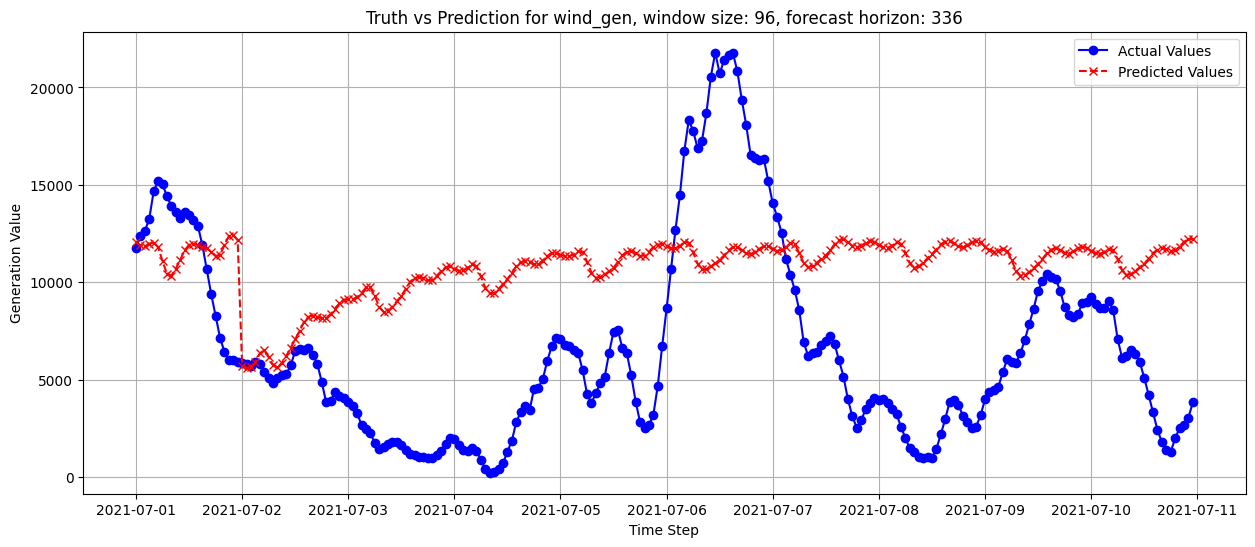

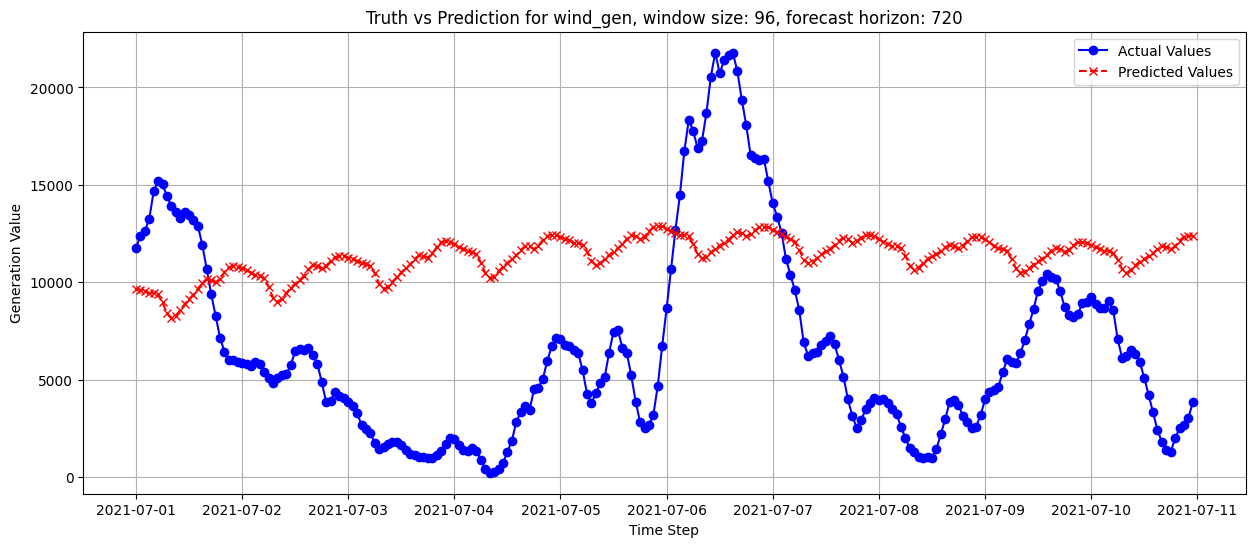

In [3]:
run_non_deepl.pipeline(args)